In [19]:
from warnings import filterwarnings
filterwarnings("ignore")

In [20]:
import pandas as pd
A = pd.read_excel(r'C:/Users/user/Downloads/dieseldata.xlsx')

In [21]:
Y =A[["gdpgrowth"]]
X =A.drop(labels = ["gdpgrowth","year"],axis = 1)

In [22]:
A.corr()

,year,gdpgrowth,diesel
year,1.000000,-0.314447,0.946099
gdpgrowth,-0.314447,1.000000,-0.290047
diesel,0.946099,-0.290047,1.000000


In [23]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 21)

In [24]:
model.intercept_

AttributeError: 'OLSResults' object has no attribute 'intercept_'

In [25]:
model.coef_

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [26]:
pred = model.predict(xtest[["diesel"]])
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(ytest,pred)


3.7517865625000018

<AxesSubplot:xlabel='diesel', ylabel='gdpgrowth'>

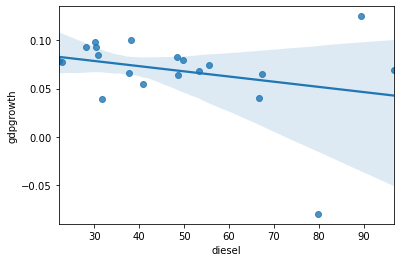

In [27]:
import seaborn as sb
sb.regplot(X,Y)

In [29]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdpgrowth   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.755
Date:                Fri, 05 Aug 2022   Prob (F-statistic):              0.206
Time:                        22:15:29   Log-Likelihood:                 28.544
No. Observations:                  16   AIC:                            -53.09
Df Residuals:                      14   BIC:                            -51.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0990      0.027      3.656      0.003       0.041       0.157
diesel        -0.0007      0.001     -1.325      0.206      -0.002       0.000
==============================================================================
Omnibus:                       12.254   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.637
Skew:                          -1.045   Prob(JB):                      0.00297
Kurtosis:                       6.617   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
round(model.rsquared_adj,4)

0.0479

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,pred_tr),2)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
ts_err = round(mean_absolute_error(ytest,pred_ts),2)
print(tr_err)
print(ts_err)

0.03
0.02
